# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr X vs Chr X Isochromosome

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 4

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_x': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p2

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_x': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_x', 'chr_x_isochromosome'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  4
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-13L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-15L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-17L.bmp
        191128-del(X)(p22)-18L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-21L.bmp
        191128-del(X)(p22)-22L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-del(X)(p22)-3L.bmp
        191128-del(X)(p22)-4L.bmp
        191128-del(X)(p22)-6L.bmp
        191128-del(X)(p22)-7L.bmp
        191128-del(X)(p22)-8L.bmp
        191128-del(X)(p22)-9L.bmp
        192478-delXq21-10L.bmp
        192478-delXq21-11L.bmp
        192478-delXq21-13L.bmp
        192478-delXq21-14L.bmp
        192478-delXq21-15L.bmp
        192478-delXq21-17L.bmp
        192478-delXq21-18L.bmp
        192478-delXq21-19L.bmp
        192478-delXq21-1L.bmp
        192478-delXq21-21L.bmp

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_isochromosome': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_isochromosome'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

215

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 5s 676ms/step - loss: 1416.7472 - accuracy: 0.5721 - val_loss: 64.6696 - val_accuracy: 0.7500
Epoch 2/500
4/4 [==============================] - 0s 121ms/step - loss: 40.7865 - accuracy: 0.6233 - val_loss: 64.1890 - val_accuracy: 0.2500
Epoch 3/500
4/4 [==============================] - 0s 118ms/step - loss: 26.7883 - accuracy: 0.6512 - val_loss: 0.6293 - val_accuracy: 0.7500
Epoch 4/500
4/4 [==============================] - 1s 136ms/step - loss: 0.5481 - accuracy: 0.7767 - val_loss: 0.7517 - val_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 119ms/step - loss: 0.3448 - accuracy: 0.8372 - val_loss: 0.8288 - val_accuracy: 0.7500
Epoch 6/500
4/4 [==============================] - 0s 109ms/step - loss: 0.1463 - accuracy: 0.9349 - val_loss: 0.0943 - val_accuracy: 0.9444
Epoch 7/500
4/4 [==============================] - 0s 120ms/step - loss: 0.1080 - accuracy: 0.9721 - val_loss: 0.1364 - val_accuracy: 0.9444
Epoch 

4/4 [==============================] - 0s 114ms/step - loss: 4.7517e-07 - accuracy: 1.0000 - val_loss: 0.2170 - val_accuracy: 0.9722
Epoch 58/500
4/4 [==============================] - 0s 113ms/step - loss: 4.6353e-07 - accuracy: 1.0000 - val_loss: 0.2170 - val_accuracy: 0.9722
Epoch 59/500
4/4 [==============================] - 0s 113ms/step - loss: 4.5410e-07 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 0.9722
Epoch 60/500
4/4 [==============================] - 0s 112ms/step - loss: 4.4301e-07 - accuracy: 1.0000 - val_loss: 0.2174 - val_accuracy: 0.9722
Epoch 61/500
4/4 [==============================] - 0s 119ms/step - loss: 4.3525e-07 - accuracy: 1.0000 - val_loss: 0.2175 - val_accuracy: 0.9722
Epoch 62/500
4/4 [==============================] - 0s 112ms/step - loss: 4.2527e-07 - accuracy: 1.0000 - val_loss: 0.2182 - val_accuracy: 0.9722
Epoch 63/500
4/4 [==============================] - 0s 117ms/step - loss: 4.1751e-07 - accuracy: 1.0000 - val_loss: 0.2191 - val_accuracy

4/4 [==============================] - 0s 114ms/step - loss: 1.7410e-07 - accuracy: 1.0000 - val_loss: 0.2268 - val_accuracy: 0.9722
Epoch 114/500
4/4 [==============================] - 0s 116ms/step - loss: 1.7244e-07 - accuracy: 1.0000 - val_loss: 0.2267 - val_accuracy: 0.9722
Epoch 115/500
4/4 [==============================] - 0s 110ms/step - loss: 1.6967e-07 - accuracy: 1.0000 - val_loss: 0.2267 - val_accuracy: 0.9722
Epoch 116/500
4/4 [==============================] - 0s 119ms/step - loss: 1.6800e-07 - accuracy: 1.0000 - val_loss: 0.2268 - val_accuracy: 0.9722
Epoch 117/500
4/4 [==============================] - 0s 115ms/step - loss: 1.6467e-07 - accuracy: 1.0000 - val_loss: 0.2271 - val_accuracy: 0.9722
Epoch 118/500
4/4 [==============================] - 0s 108ms/step - loss: 1.6246e-07 - accuracy: 1.0000 - val_loss: 0.2275 - val_accuracy: 0.9722
Epoch 119/500
4/4 [==============================] - 0s 114ms/step - loss: 1.5968e-07 - accuracy: 1.0000 - val_loss: 0.2278 - val_ac

Epoch 169/500
4/4 [==============================] - 0s 111ms/step - loss: 8.5387e-08 - accuracy: 1.0000 - val_loss: 0.2395 - val_accuracy: 0.9722
Epoch 170/500
4/4 [==============================] - 0s 114ms/step - loss: 8.4833e-08 - accuracy: 1.0000 - val_loss: 0.2399 - val_accuracy: 0.9722
Epoch 171/500
4/4 [==============================] - 0s 108ms/step - loss: 8.3724e-08 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9722
Epoch 172/500
4/4 [==============================] - 0s 120ms/step - loss: 8.3724e-08 - accuracy: 1.0000 - val_loss: 0.2404 - val_accuracy: 0.9722
Epoch 173/500
4/4 [==============================] - 0s 111ms/step - loss: 8.2060e-08 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.9722
Epoch 174/500
4/4 [==============================] - 0s 117ms/step - loss: 8.0397e-08 - accuracy: 1.0000 - val_loss: 0.2409 - val_accuracy: 0.9722
Epoch 175/500
4/4 [==============================] - 0s 116ms/step - loss: 7.9288e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
4/4 [==============================] - 0s 110ms/step - loss: 4.8793e-08 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.9722
Epoch 226/500
4/4 [==============================] - 0s 109ms/step - loss: 4.8238e-08 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.9722
Epoch 227/500
4/4 [==============================] - 0s 117ms/step - loss: 4.8238e-08 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.9722
Epoch 228/500
4/4 [==============================] - 0s 119ms/step - loss: 4.7129e-08 - accuracy: 1.0000 - val_loss: 0.2514 - val_accuracy: 0.9722
Epoch 229/500
4/4 [==============================] - 0s 116ms/step - loss: 4.7129e-08 - accuracy: 1.0000 - val_loss: 0.2512 - val_accuracy: 0.9722
Epoch 230/500
4/4 [==============================] - 0s 117ms/step - loss: 4.5466e-08 - accuracy: 1.0000 - val_loss: 0.2512 - val_accuracy: 0.9722
Epoch 231/500
4/4 [==============================] - 0s 112ms/step - loss: 4.4911e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
4/4 [==============================] - 0s 109ms/step - loss: 3.1050e-08 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.9722
Epoch 282/500
4/4 [==============================] - 0s 116ms/step - loss: 3.1050e-08 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9722
Epoch 283/500
4/4 [==============================] - 0s 115ms/step - loss: 2.9941e-08 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9722
Epoch 284/500
4/4 [==============================] - 0s 116ms/step - loss: 2.9941e-08 - accuracy: 1.0000 - val_loss: 0.2580 - val_accuracy: 0.9722
Epoch 285/500
4/4 [==============================] - 0s 110ms/step - loss: 2.9386e-08 - accuracy: 1.0000 - val_loss: 0.2582 - val_accuracy: 0.9722
Epoch 286/500
4/4 [==============================] - 0s 119ms/step - loss: 2.9386e-08 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 0.9722
Epoch 287/500
4/4 [==============================] - 0s 116ms/step - loss: 2.9386e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 337/500
4/4 [==============================] - 0s 118ms/step - loss: 2.1070e-08 - accuracy: 1.0000 - val_loss: 0.2648 - val_accuracy: 0.9722
Epoch 338/500
4/4 [==============================] - 1s 142ms/step - loss: 2.0515e-08 - accuracy: 1.0000 - val_loss: 0.2649 - val_accuracy: 0.9722
Epoch 339/500
4/4 [==============================] - 0s 113ms/step - loss: 2.0515e-08 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9722
Epoch 340/500
4/4 [==============================] - 0s 120ms/step - loss: 1.9961e-08 - accuracy: 1.0000 - val_loss: 0.2652 - val_accuracy: 0.9722
Epoch 341/500
4/4 [==============================] - 0s 115ms/step - loss: 1.8852e-08 - accuracy: 1.0000 - val_loss: 0.2654 - val_accuracy: 0.9722
Epoch 342/500
4/4 [==============================] - 0s 124ms/step - loss: 1.8852e-08 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9722
Epoch 343/500
4/4 [==============================] - 0s 113ms/step - loss: 1.8852e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 393/500
4/4 [==============================] - 1s 209ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9722
Epoch 394/500
4/4 [==============================] - 0s 121ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9722
Epoch 395/500
4/4 [==============================] - 0s 125ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2712 - val_accuracy: 0.9722
Epoch 396/500
4/4 [==============================] - 0s 114ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2714 - val_accuracy: 0.9722
Epoch 397/500
4/4 [==============================] - 1s 136ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2716 - val_accuracy: 0.9722
Epoch 398/500
4/4 [==============================] - 0s 118ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0.2716 - val_accuracy: 0.9722
Epoch 399/500
4/4 [==============================] - 0s 111ms/step - loss: 1.4416e-08 - accuracy: 1.0000 - val_loss: 0

Epoch 449/500
4/4 [==============================] - 0s 108ms/step - loss: 1.1644e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 450/500
4/4 [==============================] - 0s 116ms/step - loss: 1.1644e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 451/500
4/4 [==============================] - 0s 116ms/step - loss: 1.1089e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 452/500
4/4 [==============================] - 0s 118ms/step - loss: 1.1644e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 453/500
4/4 [==============================] - 0s 111ms/step - loss: 1.1644e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 454/500
4/4 [==============================] - 0s 113ms/step - loss: 1.1089e-08 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9722
Epoch 455/500
4/4 [==============================] - 0s 114ms/step - loss: 1.1089e-08 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19204), started 1 day, 1:42:52 ago. (Use '!kill 19204' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  39.61714761654536  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_X_cnn_iteration_4\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.972


In [39]:
len(X_test)

36

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

36

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

36

In [44]:
label = ['chr_x', 'chr_x_isochromosome']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[9.99991894e-01, 5.16507316e-05],
       [9.99996305e-01, 2.37357090e-05],
       [9.99996901e-01, 7.68071186e-05],
       [1.00000000e+00, 2.72187384e-10],
       [9.99797761e-01, 3.22726206e-04],
       [1.00000000e+00, 3.15796257e-07],
       [9.99999881e-01, 7.53766301e-07],
       [9.99968529e-01, 6.89370572e-05],
       [9.99992490e-01, 1.52539957e-04],
       [9.99962926e-01, 5.24503121e-04],
       [9.99999762e-01, 1.28645815e-05],
       [9.99996662e-01, 8.09782141e-05],
       [9.99999762e-01, 5.70759221e-06],
       [9.99999881e-01, 1.06226144e-05],
       [9.99999523e-01, 1.69803843e-05],
       [9.99994755e-01, 6.50054790e-05],
       [9.99988556e-01, 8.61815133e-05],
       [9.99990225e-01, 1.67400503e-04],
       [9.99311090e-01, 8.03292147e-04],
       [9.99999881e-01, 1.16807096e-05],
       [9.99997735e-01, 9.57798329e-05],
       [9.99998093e-01, 5.13321975e-05],
       [9.99999285e-01, 2.04906046e-05],
       [9.99994993e-01, 4.44613252e-05],
       [9.997447

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

              chr_x       0.96      1.00      0.98        27
chr_x_isochromosome       1.00      0.89      0.94         9

          micro avg       0.97      0.97      0.97        36
          macro avg       0.98      0.94      0.96        36
       weighted avg       0.97      0.97      0.97        36



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_X_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_x_isochromosome
chr_x,27,0
chr_x_isochromosome,1,8


#### Heat Map

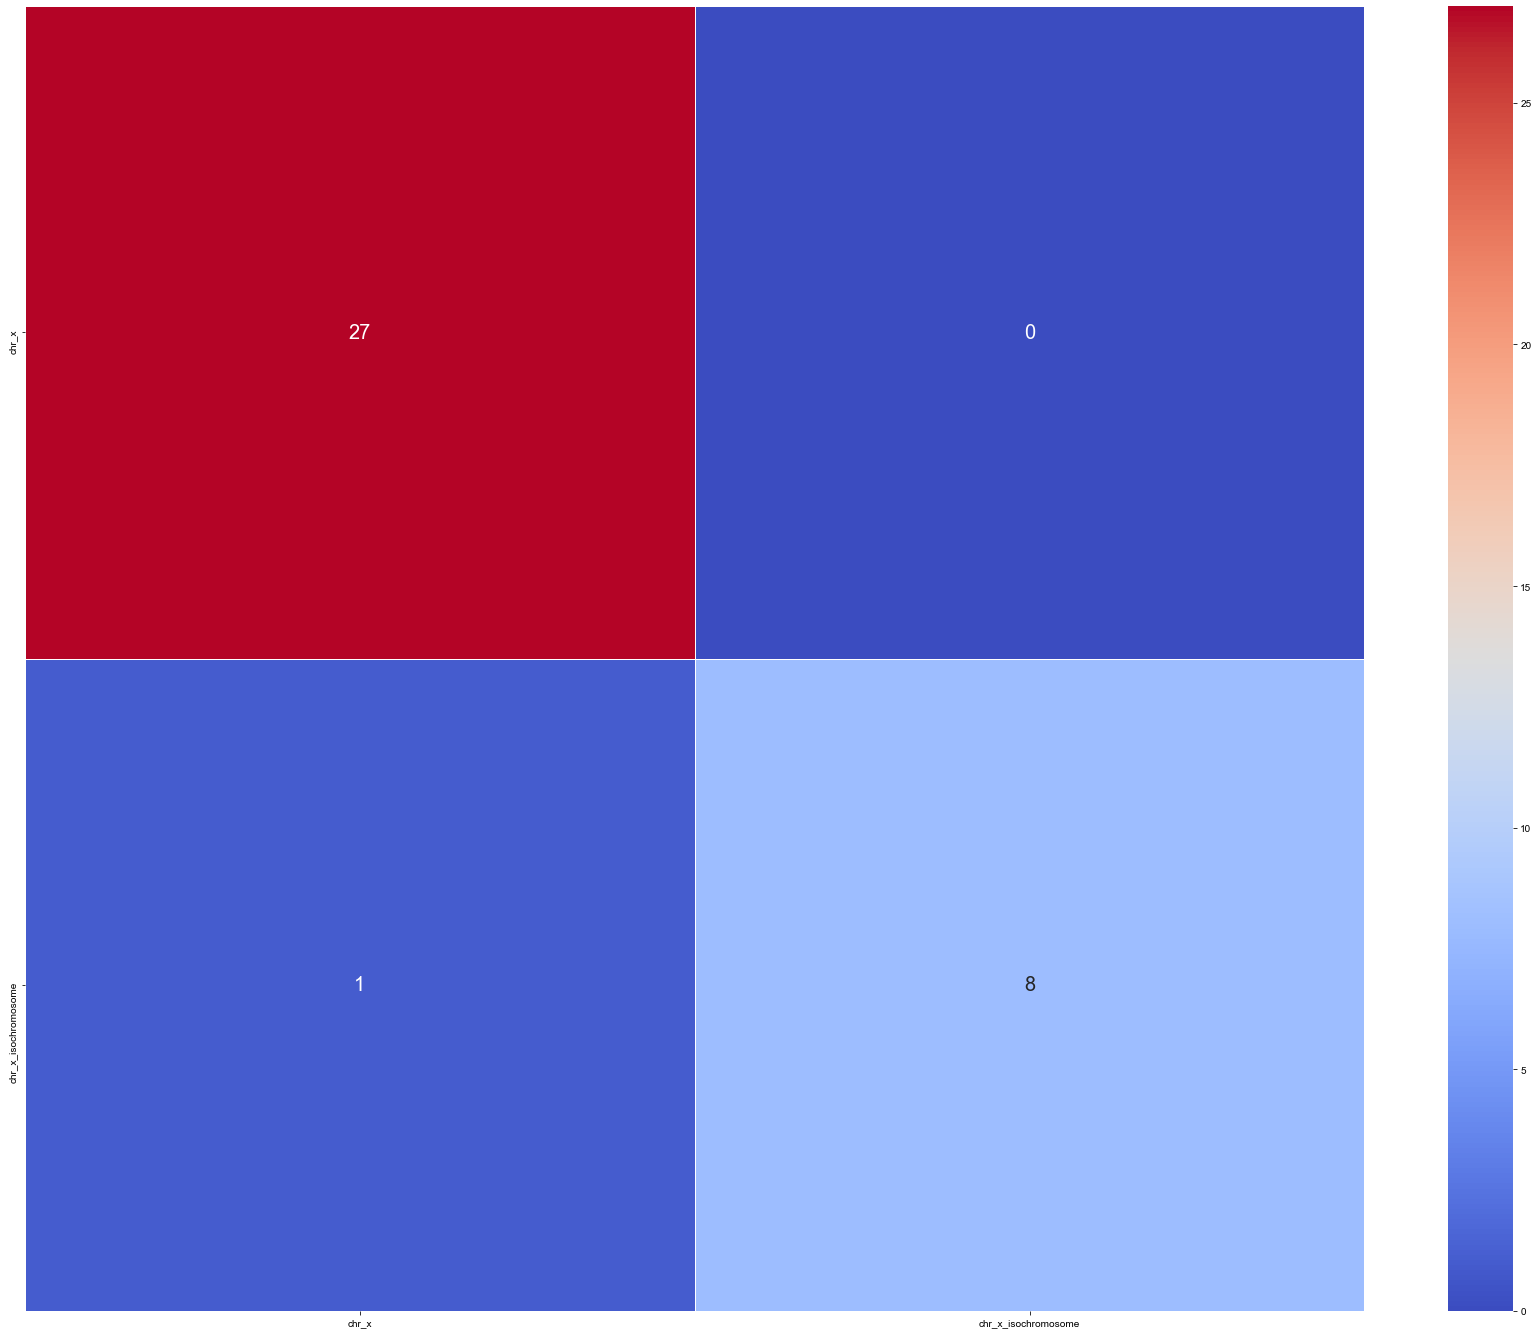

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_X_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[9.99991894e-01, 5.16507316e-05],
       [9.99996305e-01, 2.37357090e-05],
       [9.99996901e-01, 7.68071186e-05],
       [1.00000000e+00, 2.72187384e-10],
       [9.99797761e-01, 3.22726206e-04],
       [1.00000000e+00, 3.15796257e-07],
       [9.99999881e-01, 7.53766301e-07],
       [9.99968529e-01, 6.89370572e-05],
       [9.99992490e-01, 1.52539957e-04],
       [9.99962926e-01, 5.24503121e-04],
       [9.99999762e-01, 1.28645815e-05],
       [9.99996662e-01, 8.09782141e-05],
       [9.99999762e-01, 5.70759221e-06],
       [9.99999881e-01, 1.06226144e-05],
       [9.99999523e-01, 1.69803843e-05],
       [9.99994755e-01, 6.50054790e-05],
       [9.99988556e-01, 8.61815133e-05],
       [9.99990225e-01, 1.67400503e-04],
       [9.99311090e-01, 8.03292147e-04],
       [9.99999881e-01, 1.16807096e-05],
       [9.99997735e-01, 9.57798329e-05],
       [9.99998093e-01, 5.13321975e-05],
       [9.99999285e-01, 2.04906046e-05],
       [9.99994993e-01, 4.44613252e-05],
       [9.997447

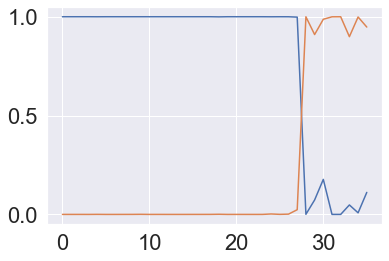

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

1.0

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

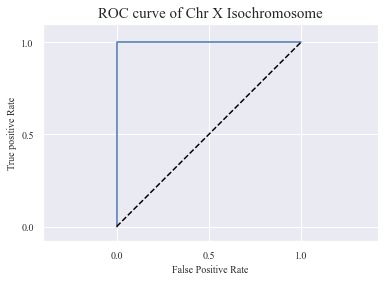

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr X Isochromosome', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_X_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  1.0


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.972


In [67]:
print(performanceReport)

                     precision    recall  f1-score   support

              chr_x       0.96      1.00      0.98        27
chr_x_isochromosome       1.00      0.89      0.94         9

          micro avg       0.97      0.97      0.97        36
          macro avg       0.98      0.94      0.96        36
       weighted avg       0.97      0.97      0.97        36



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_x,chr_x_isochromosome
chr_x,27,0
chr_x_isochromosome,1,8


In [70]:
print('AUC is ', auc_value)

AUC is  1.0


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()